# 📊 Sales Data Analysis

## 🎯 Objective
Analyze sales data to identify trends by region, category and product, and extract business insights.

In [55]:
#Importar librerías
import pandas as pd
import matplotlib.pyplot as plt


In [56]:
#Cargar el dataset
df = pd.read_csv("data.csv", encoding="latin1")
df.head()



,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [57]:
#Exploración inicial
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [58]:
df.describe()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [59]:
df.isnull().sum()


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [60]:
# Normalizar nombres de columnas
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
)



In [61]:
df.columns


Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')

In [62]:
# Convertir fechas
df['orderdate'] = pd.to_datetime(df['orderdate'])


In [63]:
## CELDA 4 – Métricas clave
# Ventas totales
df['sales'].sum()


np.float64(10032628.85)

In [64]:
## Ventas por categoría (product line)

sales_by_product = df.groupby('productline')['sales'].sum().sort_values(ascending=False)
sales_by_product


productline
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: sales, dtype: float64

In [65]:
sales_by_product = (
    df.groupby('productline')['sales']
      .sum()
      .sort_values(ascending=False)
)

sales_by_product


productline
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: sales, dtype: float64

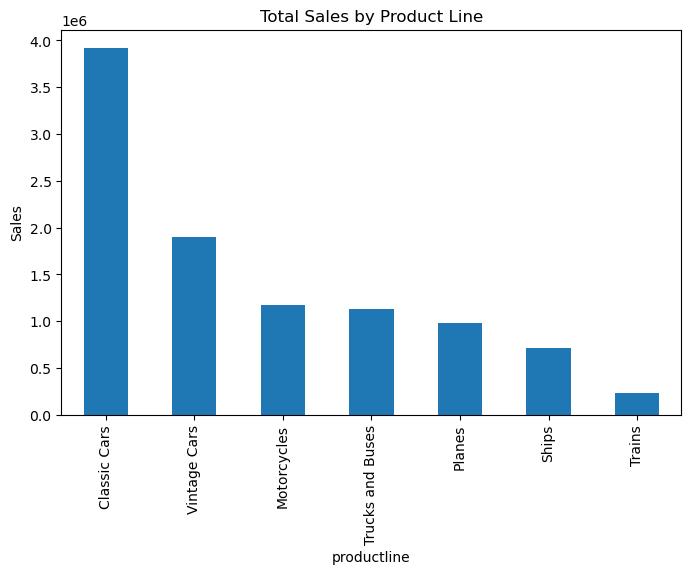

In [66]:
# Visualización 1

sales_by_product.plot(
    kind='bar',
    title='Total Sales by Product Line',
    figsize=(8,5)
)
plt.ylabel("Sales")
plt.show()


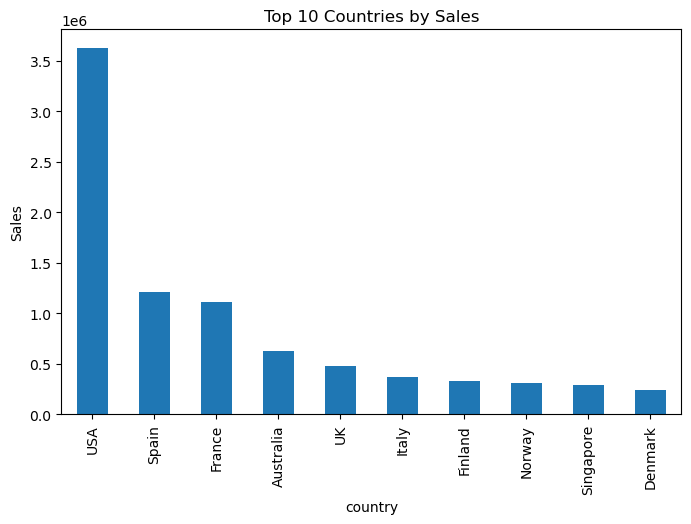

In [67]:
# Visualización 2 (región / país)

sales_by_country = df.groupby('country')['sales'].sum().sort_values(ascending=False).head(10)

sales_by_country.plot(
    kind='bar',
    title='Top 10 Countries by Sales',
    figsize=(8,5)
)
plt.ylabel("Sales")
plt.show()


## 📌 Hallazgos Clave

- Algunas líneas de producto generan significativamente mayores ventas que otras.
- Un grupo reducido de países concentra la mayor parte de los ingresos totales.
- Los patrones de ventas sugieren oportunidades para definir estrategias regionales más focalizadas.
